In [1]:
# Import our dependencies
 
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

### For data clean up pls refer to CleanUp file 

# **Preprocessing Model 2 - Characteristics of a Horse winner**

 Step 1: Read the filtered_df_tree.csv data from the Resources folder into a Pandas DataFrame.

In [3]:
file_path = r'C:\Users\aumek\OneDrive\Desktop\Git_Personnal_Rep\Resource_mustang\coverted_tree_df.csv'

# Read the CSV file into pandas
random_forest = pd.read_csv(file_path)
random_forest.head(3)


,rid,winningTime,metric,ncond,class,condition,horseName,trainerName,jockeyName,age,...,outHandicap,RPR,saddle,father,TR,OR,runners,weight,res_win,res_place
0,10312,253.88,3218.0,10,4,Good To Soft,Waterproof,Shaun Keightley,Brendan Powell,4.0,...,2.541359,103.0,9.0,Pour Moi,103.0,80.446685,9.0,66.0,1.0,1.0
1,10312,253.88,3218.0,10,4,Good To Soft,Eva's Diva,Phil Middleton,Mr Sam Lee,6.0,...,2.541359,96.0,7.0,Getaway,89.0,110.000000,9.0,65.0,0.0,1.0
2,10312,253.88,3218.0,10,4,Good To Soft,Incredible Dream,Conrad Allen,Joshua Moore,7.0,...,2.541359,97.0,5.0,Vale Of York,88.0,80.446685,9.0,72.0,0.0,1.0


In [4]:
# Determine the number of unique values in each column.
unique_application = random_forest.nunique()
print(unique_application)

rid            14077
winningTime     8692
metric            53
ncond             18
class              8
condition         18
horseName      44803
trainerName     4250
jockeyName      2822
age               16
isFav              2
position          35
distance           8
outHandicap       27
RPR              178
saddle            36
father          2691
TR               158
OR               171
runners           27
weight            34
res_win            2
res_place          2
dtype: int64


In [5]:
if "res_win" in random_forest.columns:
    print("Column 'res_win' is present in the dataset.")
else:
    print("Column 'res_win' is not present in the dataset.")

Column 'res_win' is present in the dataset.


In [6]:
# Look at res_win value counts for binning - where 0=did not win; 1=won
application_type_counts = random_forest['res_win'].value_counts()
application_type_counts

res_win
0.0    128817
1.0     14094
Name: count, dtype: int64

In [7]:
# Check for missing values (NaN)
nan_columns = random_forest.columns[random_forest.isnull().any()].tolist()
print("Columns with NaN values:")
print(nan_columns)

Columns with NaN values:
[]


In [8]:
num_rows = random_forest.shape[0]
num_columns = random_forest.shape[1]
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 142911
Number of Columns: 23


In [9]:
sampled_df = random_forest.sample(n=30000, random_state=42)
num_rows = sampled_df.shape[0]
num_columns = sampled_df.shape[1]
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 30000
Number of Columns: 23


In [10]:
encoded_df = pd.get_dummies(sampled_df)
encoded_df.head(5)

,rid,winningTime,metric,ncond,class,age,isFav,position,distance,outHandicap,...,father_Zambezi Sun,father_Zamindar,father_Zanzibari,father_Zebedee,father_Zed,father_Zenno Rob Roy,father_Zerpour,father_Zivo,father_Zoffany,father_Zoustar
101353,410815,222.40,3218.0,1,4,6.0,0.0,5.0,2.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
29275,401605,93.58,1407.0,12,0,3.0,0.0,11.0,1407.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
92053,409839,107.79,1810.0,8,0,4.0,0.0,1.0,1.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
38706,404193,300.77,4323.5,3,0,6.0,0.0,40.0,2.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
86312,409139,88.24,1407.0,0,5,9.0,0.0,11.0,1407.0,2.541359,...,False,False,False,False,False,False,False,False,False,False


### Further steps in the model-building process: feature selection, model selection, training, and evaluation ###

In [11]:
 # Define features set
features = encoded_df.copy()
features.drop("res_win", axis=1, inplace=True)
features.head()


,rid,winningTime,metric,ncond,class,age,isFav,position,distance,outHandicap,...,father_Zambezi Sun,father_Zamindar,father_Zanzibari,father_Zebedee,father_Zed,father_Zenno Rob Roy,father_Zerpour,father_Zivo,father_Zoffany,father_Zoustar
101353,410815,222.40,3218.0,1,4,6.0,0.0,5.0,2.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
29275,401605,93.58,1407.0,12,0,3.0,0.0,11.0,1407.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
92053,409839,107.79,1810.0,8,0,4.0,0.0,1.0,1.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
38706,404193,300.77,4323.5,3,0,6.0,0.0,40.0,2.0,2.541359,...,False,False,False,False,False,False,False,False,False,False
86312,409139,88.24,1407.0,0,5,9.0,0.0,11.0,1407.0,2.541359,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Define target vector
target = encoded_df["res_win"].values.reshape(-1, 1)
target[:5]


array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [13]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=78)

In [14]:
# Creating StandardScaler instance
scaler = StandardScaler()


In [15]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)


In [16]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

 ## Fitting the RandomForest

In [17]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
# Reshape the target vector y using ravel()
y_train = y_train.ravel()

In [18]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

##  Making Predictions Using the RandomForest

In [19]:
 # Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

 ## Model Evaluation

In [20]:
 # Calculating the confusion matrix
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [21]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,8036,0
Actual 1,0,964


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8036
         1.0       1.00      1.00      1.00       964

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



## Feature Importance

In [22]:
random_forest.columns

Index(['rid', 'winningTime', 'metric', 'ncond', 'class', 'condition',
       'horseName', 'trainerName', 'jockeyName', 'age', 'isFav', 'position',
       'distance', 'outHandicap', 'RPR', 'saddle', 'father', 'TR', 'OR',
       'runners', 'weight', 'res_win', 'res_place'],
      dtype='object')

In [23]:
# Filter the top 10 winner horses
top_10_winners = random_forest[random_forest['res_win'] == 1].head(10)

# Select the desired features for printing
features_to_print = ['jockeyName', 'father', 'isFav', 'RPR','class', 'age' ]



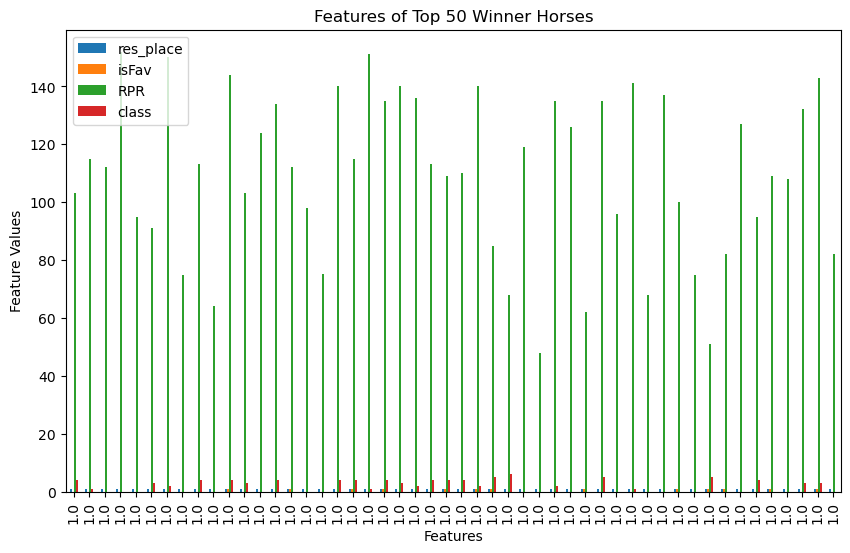

In [57]:
import matplotlib.pyplot as plt

# Filter the top 50 winner horses
top_50_winners = random_forest[random_forest['res_win'] == 1].head(50)

# # Select the desired features for printing
# features_to_print = ['position', 'res_place', 'isFav', 'RPR','class']

# Plot the features for the top 10 winner horses
top_10_winners[features_to_print].plot(kind='bar', x='position', figsize=(10, 6))

# Set the plot title and axis labels
plt.title('Features of Top 50 Winner Horses')
plt.xlabel('Features')
plt.ylabel('Feature Values')

# Display the plot
plt.show()


In [83]:
# Define a dictionary to map the old column names to the new ones
column_name_mapping = {
    'rid': 'Race ID',
    'winningTime': 'Winning Time',
    'metric': 'Metric',
    'ncond': 'Condition',
    'class': 'Class',
    'horseName': 'HorseName',
    'trainerName': 'TrainerName',
    'jockeyName': 'JockeyName',
    'age': 'Age',
    'isFav': 'IsFavorite',
    'position': 'Position',
    'distance': 'Distance',
    'outHandicap': 'OutHandicap',
    'RPR': 'Racing Post Rating',
    'saddle': 'Saddle',
    'father': 'Father',
    'TR': 'Timeform Rating',
    'OR': 'Official Rating',
    'runners': 'Runners',
    'weight': 'Weight',
    'res_win': 'Result_Win',
    'res_place': 'Result_Place',
}

# Rename the columns using the dictionary
renamed_df= random_forest.rename(columns=column_name_mapping)


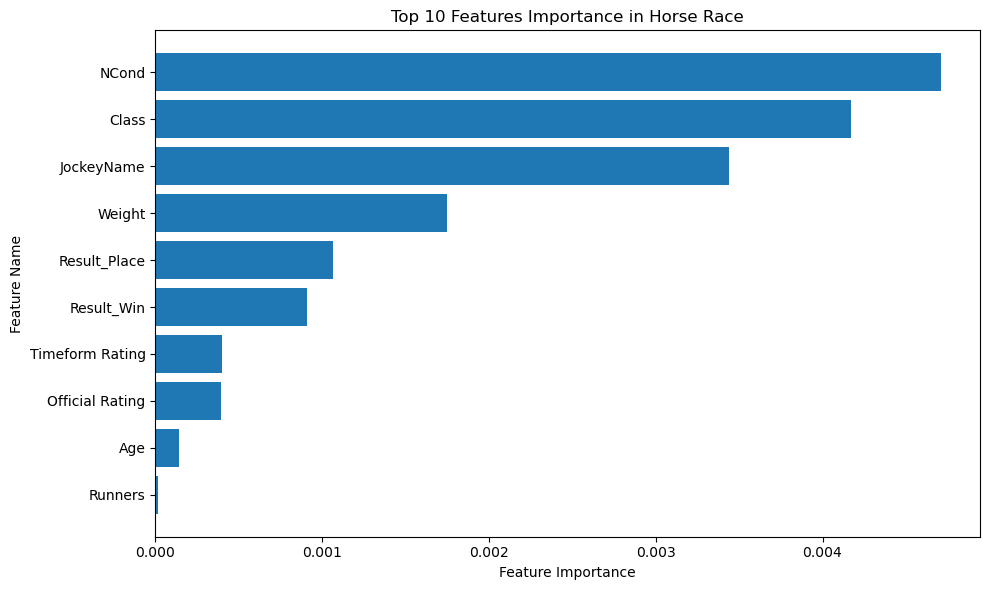

In [82]:
import matplotlib.pyplot as plt

# Assuming you have 'rf_model' and 'df' with your features as defined in your code

# Get the feature importances from the random forest model
importances = rf_model.feature_importances_

# Create a list of feature names
feature_names = renamed_df.columns

# Sort the features and their importances in descending order
sorted_features = sorted(zip(importances, feature_names), reverse=False)
importances, feature_names = zip(*sorted_features)

# Plot the top 10 features in a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names[:10], importances[:10])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Features Importance in Horse Race')
plt.tight_layout()
plt.show()


In [71]:
random_forest.columns

Index(['RaceID', 'WinningTime', 'Metric', 'NCond', 'Class', 'Condition',
       'HorseName', 'TrainerName', 'JockeyName', 'Age', 'IsFavorite',
       'Position', 'Distance', 'OutHandicap', 'Racing Post Rating', 'Saddle',
       'Father', 'Timeform Rating', 'Official Rating', 'Runners', 'Weight',
       'Result_Win', 'Result_Place'],
      dtype='object')

In [72]:

# Group by 'trainerName' and 'jockeyName', and count the number of winners for each group
trainer_winners = random_forest[random_forest['Result_Win'] == 1].groupby('TrainerName')['Result_Win'].sum()
jockey_winners = random_forest[random_forest['Result_Win'] == 1].groupby('JockeyName')['Result_Win'].sum()

# Sort the results in descending order to find the best trainer and jockey
best_trainer = trainer_winners.idxmax()
best_jockey = jockey_winners.idxmax()

# Display the total winner horses under every trainer and jockey
print("Total Winner Horses under Every Trainer:")
print(trainer_winners)
print("\nTotal Winner Horses under Every Jockey:")
print(jockey_winners)

# Display the best trainer and jockey
print("\nBest Trainer:", best_trainer)
print("Best Jockey:", best_jockey)



Total Winner Horses under Every Trainer:
TrainerName
A Bonin               5.0
A Botti               5.0
A C Greeff            5.0
A Chaille-Chaille    21.0
A Cintra Pereira      1.0
                     ... 
Yuichi Shikato        1.0
Yuji Iida             1.0
Yvette Bremner        1.0
Z Oosthuizen          2.0
Zoe Davison           6.0
Name: Result_Win, Length: 1816, dtype: float64

Total Winner Horses under Every Jockey:
JockeyName
A Alfouraidi        1.0
A Andrews           1.0
A Correia           2.0
A Domeyer           2.0
A L Silva           1.0
                  ...  
Yuji Tannai         1.0
Yusuke Fujioka      1.0
Yutaka Take         8.0
Yutaka Yoshida      1.0
Zac Purton        127.0
Name: Result_Win, Length: 1293, dtype: float64

Best Trainer: Gordon Elliott
Best Jockey: Ben Curtis


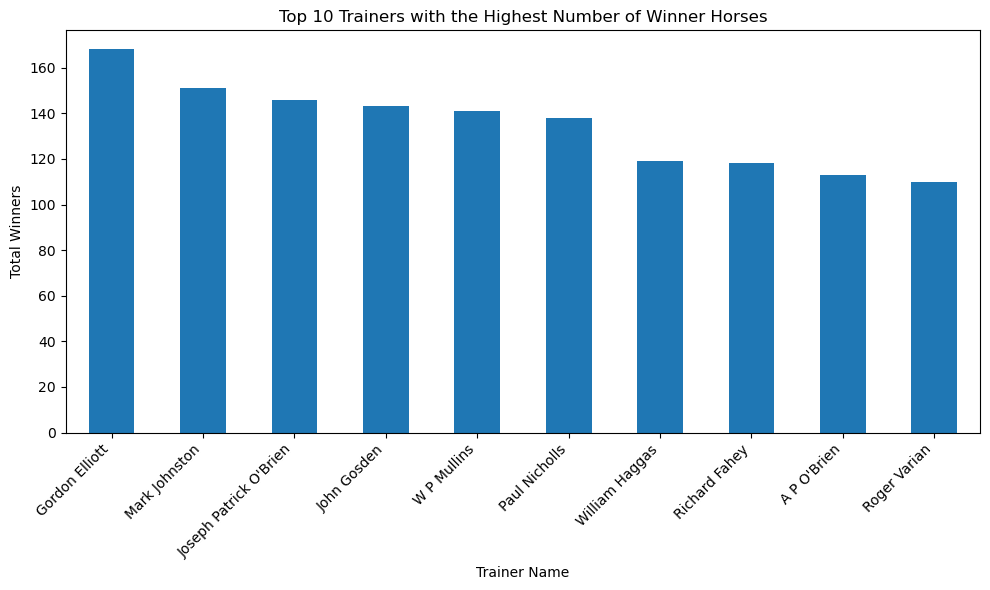

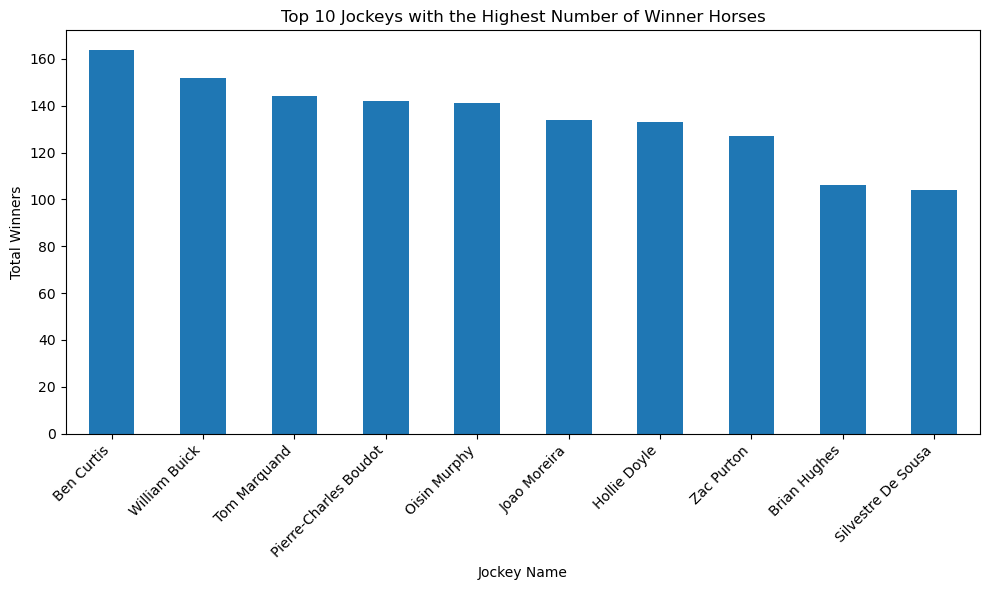


Best Trainer: Gordon Elliott
Best Jockey: Ben Curtis


In [80]:
# Group by 'trainerName' and 'jockeyName', and count the number of winners for each group
trainer_winners = random_forest[random_forest['Result_Win'] == 1].groupby('TrainerName')['Result_Win'].sum()
jockey_winners = random_forest[random_forest['Result_Win'] == 1].groupby('JockeyName')['Result_Win'].sum()

# Sort the results in descending order to find the top 10 trainers and jockeys
top_10_trainers = trainer_winners.nlargest(10)
top_10_jockeys = jockey_winners.nlargest(10)

# Plot the bar chart for top 10 trainers with the highest number of winners
plt.figure(figsize=(10, 6))
top_10_trainers.plot(kind='bar')
plt.xlabel('Trainer Name')
plt.ylabel('Total Winners')
plt.title('Top 10 Trainers with the Highest Number of Winner Horses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the bar chart for top 10 jockeys with the highest number of winners
plt.figure(figsize=(10, 6))
top_10_jockeys.plot(kind='bar')
plt.xlabel('Jockey Name')
plt.ylabel('Total Winners')
plt.title('Top 10 Jockeys with the Highest Number of Winner Horses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the names of the best trainer and jockey
print("\nBest Trainer:", top_10_trainers.idxmax())
print("Best Jockey:", top_10_jockeys.idxmax())
